In [7]:
#import the libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense

In [8]:
#Here we are loading the data
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
#Here we are reshapeing the data
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

In [12]:
x_train.shape

(60000, 28, 28, 1)

In [13]:
x_test.shape

(10000, 28, 28, 1)

In [14]:
#Here we are normalizing the data
x_train=x_train/255
x_test=x_test/255

In [15]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [16]:
x_test

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [19]:
#create a model
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))

#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation="relu"))
model.add(Dense(10,activation="softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [20]:
#Compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [21]:
#Fitting the model
model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 299us/sample - loss: 0.1495 - acc: 0.9558 - val_loss: 0.0552 - val_acc: 0.9812
Epoch 2/10
60000/60000 [==============================] - 17s 290us/sample - loss: 0.0515 - acc: 0.9844 - val_loss: 0.0453 - val_acc: 0.9852
Epoch 3/10
60000/60000 [==============================] - 17s 290us/sample - loss: 0.0328 - acc: 0.9898 - val_loss: 0.0440 - val_acc: 0.9854
Epoch 4/10
60000/60000 [==============================] - 18s 305us/sample - loss: 0.0220 - acc: 0.9931 - val_loss: 0.0439 - val_acc: 0.9850
Epoch 5/10
60000/60000 [==============================] - 18s 297us/sample - loss: 0.0160 - acc: 0.9949 - val_loss: 0.0490 - val_acc: 0.9857
Epoch 6/10
60000/60000 [==============================] - 17s 288us/sample - loss: 0.0105 - acc: 0.9967 - val_loss: 0.0449 - val_acc: 0.9869
Epoch 7/10
60000/60000 [==============================] - 17s 283us/sample - loss: 0.0091 - acc: 0.9971 

In [22]:
#evaluating the model
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 112us/sample - loss: 0.0554 - acc: 0.9864


[0.055360201747978524, 0.98640007]

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
y_predict=model.predict_classes(x_test)
cm=confusion_matrix(y_test,y_predict)
cm

array([[ 977,    0,    0,    0,    0,    0,    2,    1,    0,    0],
       [   0, 1130,    0,    1,    0,    1,    2,    0,    1,    0],
       [   1,    3, 1014,    1,    1,    0,    1,    8,    2,    1],
       [   0,    0,    4,  996,    0,    5,    0,    3,    2,    0],
       [   0,    0,    0,    0,  971,    0,    3,    0,    1,    7],
       [   1,    0,    0,    8,    0,  879,    4,    0,    0,    0],
       [   5,    3,    0,    0,    1,    3,  945,    0,    1,    0],
       [   0,    3,    2,    1,    0,    0,    0, 1020,    1,    1],
       [   6,    1,    4,    2,    2,    4,    3,    5,  940,    7],
       [   1,    4,    0,    1,    5,    4,    0,    1,    1,  992]],
      dtype=int64)

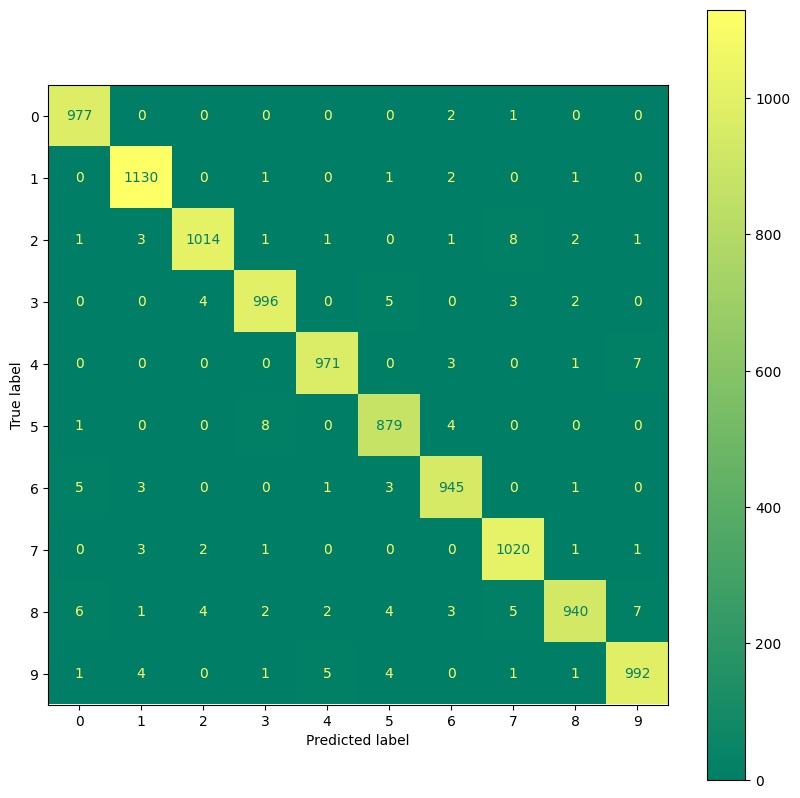

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
display=ConfusionMatrixDisplay(confusion_matrix=cm)

fig,ax=plt.subplots(figsize=(10,10))
disp=display.plot(ax=ax,cmap="summer")

plt.show()

In [25]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.98      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [26]:
model.predict(x_test)

array([[5.5187262e-13, 3.8061741e-12, 9.3155525e-11, ..., 9.9999988e-01,
        2.9462902e-10, 1.3252054e-07],
       [1.3293352e-19, 1.5585004e-11, 1.0000000e+00, ..., 1.0152527e-23,
        1.6103025e-21, 2.1928781e-22],
       [7.7899269e-14, 1.0000000e+00, 4.5637469e-11, ..., 3.5065670e-10,
        9.4140806e-11, 2.6008575e-14],
       ...,
       [4.8690978e-18, 4.4797463e-15, 3.5739179e-16, ..., 3.6441743e-13,
        9.9789285e-13, 3.8547182e-10],
       [3.4101191e-14, 3.6507864e-18, 2.8606136e-22, ..., 6.0592754e-18,
        5.8454891e-08, 3.9158490e-15],
       [3.1241884e-17, 6.3048959e-18, 4.4523860e-19, ..., 6.3015548e-21,
        2.3126856e-16, 6.2304698e-20]], dtype=float32)

In [63]:
import matplotlib.pyplot as plt
test=plt.imread(r"C:\Users\ShibuKumar\Downloads\sam_images.png")

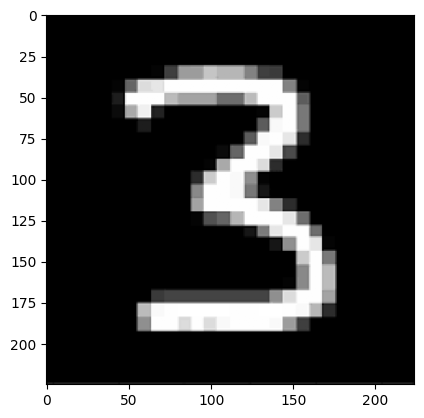

In [64]:
img=plt.imshow(test)

In [65]:
from skimage import transform
resize=transform.resize(test,(28,28,1))

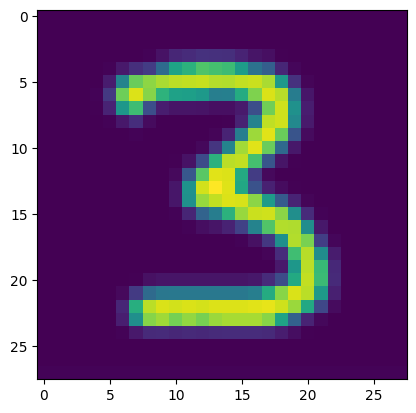

In [66]:
img=plt.imshow(resize)

In [67]:
import numpy as np
prediction=model.predict(np.array([resize]))
prediction

array([[5.0113833e-08, 2.1249125e-05, 4.6516670e-05, 9.9976188e-01,
        4.3257369e-08, 3.4553086e-05, 1.3636198e-07, 4.0612701e-07,
        1.1697623e-04, 1.8177239e-05]], dtype=float32)

In [73]:
np.argmax(prediction,axis=-1)

array([3], dtype=int64)

In [74]:
classification=[0,1,2,3,4,5,6,7,8,9]

In [75]:
classification[3]

3

In [76]:
model.save("CNN-Mnist dataset.h5")